# Performance measures for binary classification 

## Accuracy 

**Accuracy** is a mere proportion of the correct prediction of your algorithm. It can be calculated using the `accuracy_score` function in scikit-learn:

In [151]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# I will use the data from the Kaggle's Titanic competition
data = pd.read_csv('../Kaggle competitions/Titanic/input/train.csv');
data['Pclass'] = data['Pclass'].replace({1: 'first', 2: 'second', 3: 'third'});
data= data[data['Embarked'].notnull()];
y = data['Survived'];
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'];
X = data[cols];
X.loc[:, 'Age'] = X.loc[:, 'Age'].fillna(X['Age'].mean());
X = pd.get_dummies(X, prefix_sep='_', drop_first=True);

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y);

model = GaussianNB()
y_model = model.fit(Xtrain, ytrain). predict(Xtest)

accuracy1 = accuracy_score(ytest, y_model);
accuracy1

C:\Users\Carlotta\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.757847533632287

Accuracy is equal to

In [152]:
accuracy2 = (ytest == y_model).sum()/len(ytest)
accuracy2

0.757847533632287

In [153]:
accuracy1 == accuracy2

True

Using cross-validation one can calculate the mean accuracy score as follows:

In [154]:
scores = cross_val_score(model, Xtrain, ytrain, cv=5)
scores.mean()

0.792851531814611

## Confusion matrix 

A **confusion matrix** is a table that allows the visualization of a **supervised learning algorithm**. This allows a more detailed analysis then the **accuracy**, which is just a proportion of correct classification.

|             |predicted negative|predicted positive |
| ---         |:----------------:|:-----------------:|
|**negative** |        TN        |        FP         |
|**positive** |        FN        |        TP         |

TN = True Negative, FN = False Negative, TP = True Positive, FP = False Positive

With scikit-learn we can compute the confusion matric using the `confusion_matrix` function:

array([[113,  19],
       [ 35,  56]], dtype=int64)

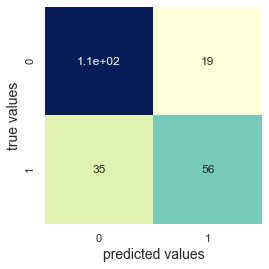

In [156]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

confusion = confusion_matrix(ytest, y_model)
sns.heatmap(confusion, annot=True, square = True, cbar=False, cmap='YlGnBu')
plt.xlabel('predicted values', size=14)
plt.ylabel('true values', size=14);

### Function that plots the heatmap of the confusion matrix 

In [166]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def plot_confusion(ytest, y_model):
    confusion = confusion_matrix(ytest, y_model)
    sns.heatmap(confusion, annot=True, square = True, cbar=False, cmap='YlGnBu')
    plt.xlabel('predicted values', size=14)
    plt.ylabel('true values', size=14)
    return plt.show()

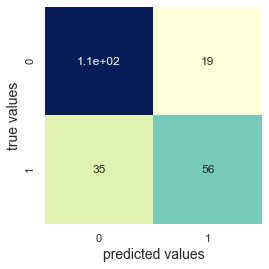

In [167]:
plot_confusion(ytest, y_model)

## Precision, recall and f1_score 

- **Precision** is the number of correctly classified positive examples divided by the number of examples labeled by the system as positive, i.e. it is the **class agreement of the data labels with the positive labels given by the classifier**:

$$
{\rm precision} = \dfrac{\rm TP}{\rm TP + FP}
$$

- **Recall** is the number of correctly classified positive examples divided by the number of positive examples in the data, i.e. it gives the **effectiveness of a classifier to identify positive labels**:

$$
{\rm recall} = \dfrac{\rm TP}{\rm TP + FN}
$$

- The **f1_score** is a combination of the above and gives **relations between data’s positive labels and those given by a classifier**: 

$$
{\rm f1} = \dfrac{2 \times ({\rm precision} \times {\rm recall})}{\rm precision + recall}
$$

In [157]:
from sklearn.metrics import classification_report
import pandas as pd

print(classification_report(ytest, y_model, target_names=['died', 'survived']))

              precision    recall  f1-score   support

        died       0.76      0.86      0.81       132
    survived       0.75      0.62      0.67        91

    accuracy                           0.76       223
   macro avg       0.76      0.74      0.74       223
weighted avg       0.76      0.76      0.75       223



In [159]:
report = pd.DataFrame(classification_report(ytest, y_model, target_names=['died', 'survived'], output_dict=True))

In [160]:
report.iloc[:, 0:4].T

,f1-score,precision,recall,support
died,0.807143,0.763514,0.856061,132.000000
survived,0.674699,0.746667,0.615385,91.000000
accuracy,0.757848,0.757848,0.757848,0.757848
macro avg,0.740921,0.755090,0.735723,223.000000


### Function that compares different algoritms 

Defining a function to compare algorithms

In [169]:
import pandas as pd
from sklearn.metrics import classification_report 

def compare_binary_classification(models, Xtrain, Xtest, ytrain, ytest):
    """Outputs a DataFrame with precision, recall and f1 score for each model(hypermarameters)"""
    
    report0 = pd.DataFrame() # Precision, recall, f1_score and support for label 0
    report1 = pd.DataFrame() # Precision, recall, f1_score and support for label 1
    
    for name, model in models: # Models is a list of tuples ('model name', model(hyperparameters))
        y_model = model.fit(Xtrain, ytrain).predict(Xtest)
        report0[name] = pd.DataFrame(classification_report(ytest, y_model, output_dict=True)).iloc[:, 0]
        report1[name] = pd.DataFrame(classification_report(ytest, y_model, output_dict=True)).iloc[:, 1]

    return report0.T, report1.T

In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Instantiate models
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear', random_state=1)))

r0, r1 = compare_binary_classification(models, Xtrain, Xtest, ytrain, ytest)

In [164]:
r0

,f1-score,precision,recall,support
NB,0.807143,0.763514,0.856061,132.0
SVM,0.842857,0.797297,0.893939,132.0


In [165]:
r1

,f1-score,precision,recall,support
NB,0.674699,0.746667,0.615385,91.0
SVM,0.734940,0.813333,0.670330,91.0
